In [2]:
# Importing necessary libraries for data preprocessing, model building, evaluation, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import chi2

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
 
from skopt import BayesSearchCV

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold

## Data Loading

In [3]:
# improting dataset in df dataframe
mushroom_df = pd.read_csv('mushrooms.csv')

In [3]:
# Set display options to show all columns
pd.set_option('display.max_columns',None)

In [4]:
#     Attribute Information: (type: edible=e, poisonous=p)

#     cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
#     cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
#     cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
#     bruises: bruises=t,no=f
#     odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
#     gill-attachment: attached=a,descending=d,free=f,notched=n
#     gill-spacing: close=c,crowded=w,distant=d
#     gill-size: broad=b,narrow=n
#     gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
#     stalk-shape: enlarging=e,tapering=t
#     stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
#     stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
#     stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
#     stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
#     stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
#     veil-type: partial=p,universal=u
#     veil-color: brown=n,orange=o,white=w,yellow=y
#     ring-number: none=n,one=o,two=t
#     ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
#     spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
#     population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
#     habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## Exploratory Data Analysis (EDA)

In [4]:
# Displaying the summary of the dataset, including column names, non-null counts, and data types.
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   type                      8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [5]:
# Displaying the number of rows and columns in the dataset.
mushroom_df.shape

(8124, 23)

In [6]:
# Summary statistics for numerical columns in the  dataset.
mushroom_df.describe()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
# Display the first 5 rows of the dataset.
mushroom_df.head(5)

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [8]:
# Display the last 5 rows of the dataset.
mushroom_df.tail(5)

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


In [9]:
# Check the number of missing values in each column.
mushroom_df.isnull().sum()

type                        0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [10]:
# Count the number of duplicate rows in the dataset.
mushroom_df.duplicated().sum()

0

### Distribution of Mushroom Types

type
e    4208
p    3916
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29084\3770913643.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=mushroom_df, palette='Set2')


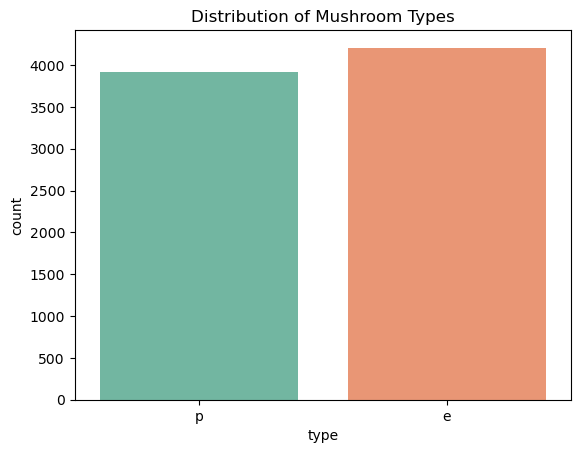

In [17]:
# Display and visualize the distribution of mushroom types.
print(mushroom_df['type'].value_counts())
sns.countplot(x='type', data=mushroom_df, palette='Set2')
plt.title("Distribution of Mushroom Types")
plt.show()

### Few feature distribution

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\1235024841.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")


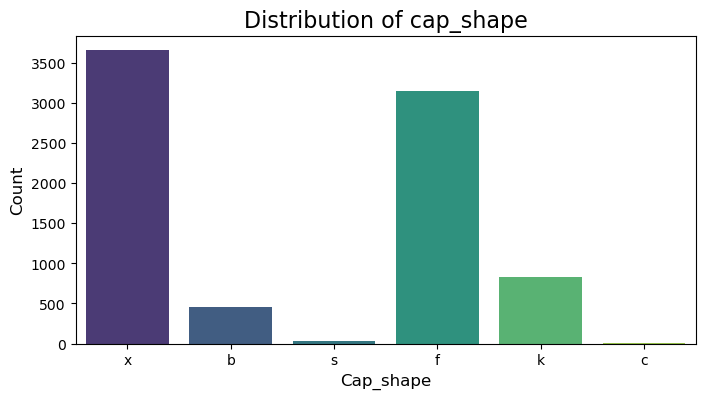

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\1235024841.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")


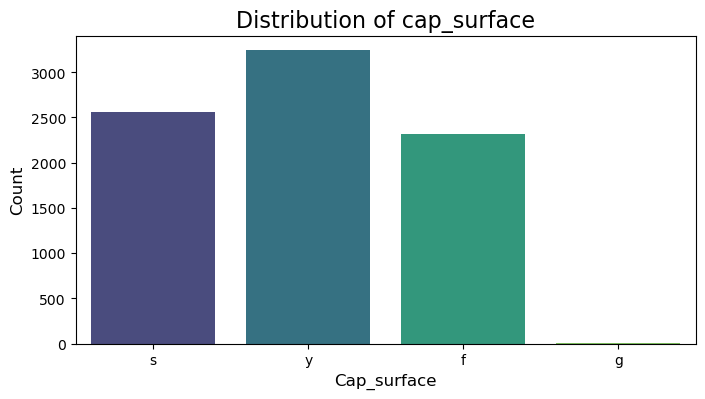

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\1235024841.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")


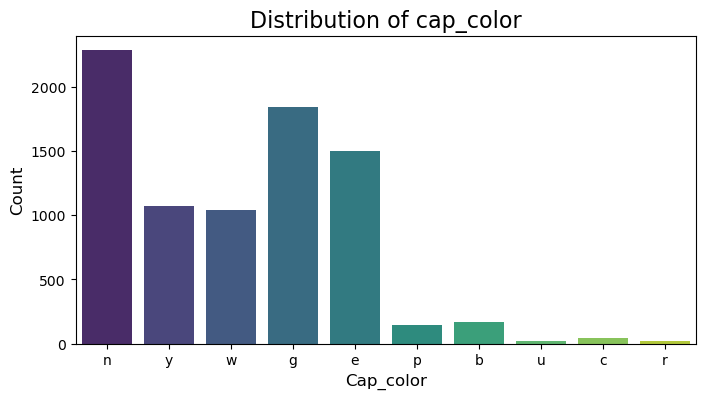

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\1235024841.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")


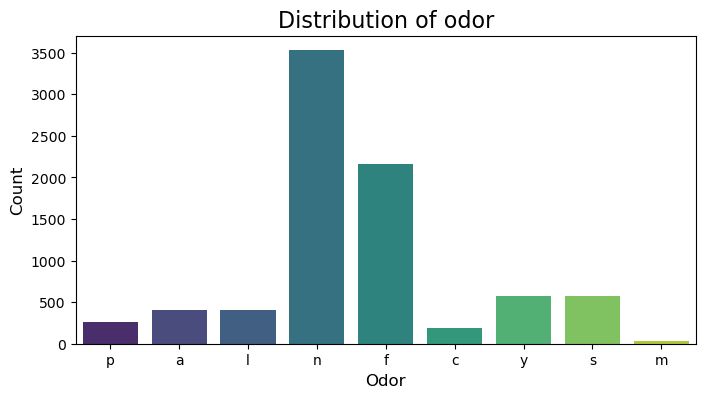

In [ ]:
# Plot the distribution of categorical columns in the dataset.
def plot_categorical_distributions(df, columns, figsize=(8, 4)):
    for column in columns:
        plt.figure(figsize=figsize)
        sns.countplot(data=df, x=column, palette="viridis")
        plt.title(f"Distribution of {column}", fontsize=16)
        plt.xlabel(column.capitalize(), fontsize=12)
        plt.ylabel("Count", fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()

categorical_columns = ["cap_shape", "cap_surface", "cap_color", "odor"]
plot_categorical_distributions(mushroom_df, categorical_columns)

### Feature Importance

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\3887426526.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Chi2 Score', y='Feature', palette='viridis')


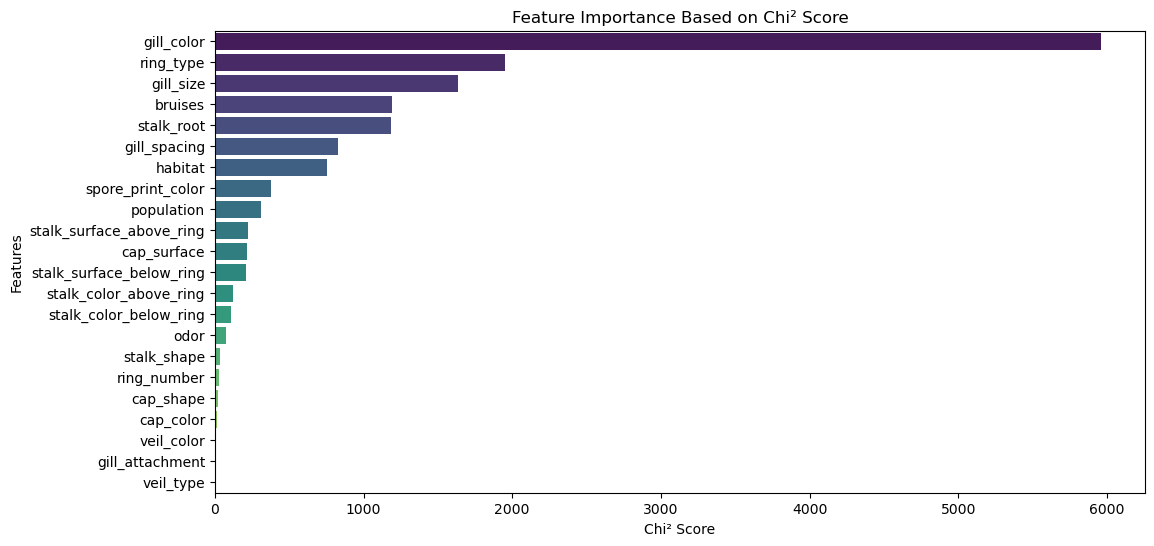

In [7]:
encoder = LabelEncoder()
encoded_data = mushroom_df.apply(encoder.fit_transform)

X = encoded_data.drop('type', axis=1)
y = encoded_data['type']
chi_scores, p_values = chi2(X, y)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi_scores})
feature_importance = feature_importance.sort_values(by='Chi2 Score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='Chi2 Score', y='Feature', palette='viridis')
plt.title('Feature Importance Based on Chi² Score')
plt.xlabel('Chi² Score')
plt.ylabel('Features')
plt.show()

### Unique value count

In [13]:
unique_values = mushroom_df.nunique()
unique_values

type                         2
cap_shape                    6
cap_surface                  4
cap_color                   10
bruises                      2
odor                         9
gill_attachment              2
gill_spacing                 2
gill_size                    2
gill_color                  12
stalk_shape                  2
stalk_root                   5
stalk_surface_above_ring     4
stalk_surface_below_ring     4
stalk_color_above_ring       9
stalk_color_below_ring       9
veil_type                    1
veil_color                   4
ring_number                  3
ring_type                    5
spore_print_color            9
population                   6
habitat                      7
dtype: int64

### Correlation matrix

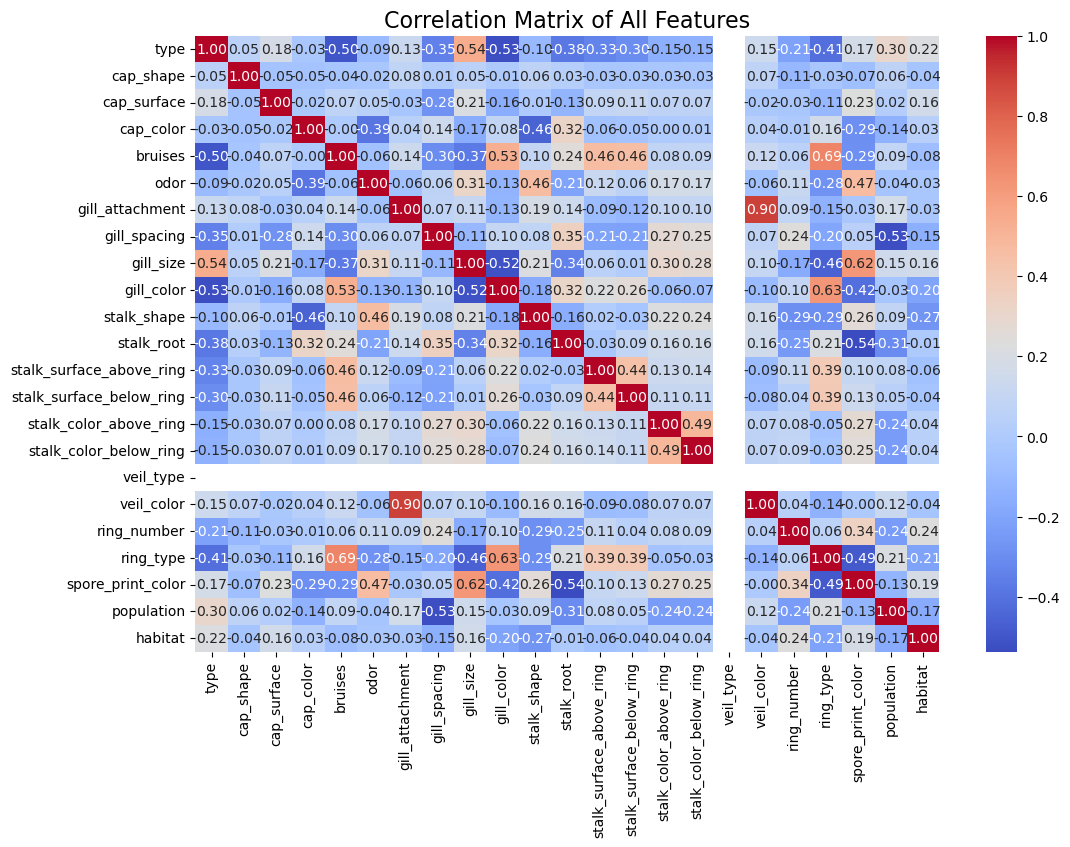

In [7]:
# Encoding categorical data into numeric
label_encoded_df = mushroom_df.copy()
label_encoder = LabelEncoder()
for column in mushroom_df.columns:
    label_encoded_df[column] = label_encoder.fit_transform(mushroom_df[column])

# Computing the correlation matrix
correlation_matrix = label_encoded_df.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of All Features", fontsize=16)
plt.show()

### Detecting rare columns

In [ ]:
# Find and print rare combinations for 'cap_shape' and 'odor'
print("Rare Combinations for 'cap_shape' and 'odor':")
rare_combinations_cap_shape_odor = mushroom_df.groupby(['cap_shape', 'odor']).size().reset_index(name='count').sort_values('count', ascending=True)
print(rare_combinations_cap_shape_odor.head(5).to_string(index=False))
print("\n")

# Find and print rare combinations for 'gill_attachment' and 'stalk_shape'
print("Rare Combinations for 'gill_attachment' and 'stalk_shape':")
rare_combinations_gill_attachment_stalk_shape = mushroom_df.groupby(['gill_attachment', 'stalk_shape']).size().reset_index(name='count').sort_values('count', ascending=True)
print(rare_combinations_gill_attachment_stalk_shape.head(5).to_string(index=False))
print("\n")

# Find and print rare combinations for 'spore_print_color' and 'population'
print("Rare Combinations for 'spore_print_color' and 'population':")
rare_combinations_spore_print_color_population = mushroom_df.groupby(['spore_print_color', 'population']).size().reset_index(name='count').sort_values('count', ascending=True)
print(rare_combinations_spore_print_color_population.head(5).to_string(index=False))


Rare Combinations for 'cap_shape' and 'odor':
cap_shape odor  count
        c    n      4
        k    m     12
        x    m     12
        f    m     12
        s    n     32


Rare Combinations for 'gill_attachment' and 'stalk_shape':
gill_attachment stalk_shape  count
              a           e    210
              f           e   3306
              f           t   4608


Rare Combinations for 'spore_print_color' and 'population':
spore_print_color population  count
                b          c     24
                o          v     24
                o          c     24
                y          c     24
                n          c     24


## Pre-processing

### Stalk Root Pre-processing

In [5]:
# Display unique values in the 'stalk_root' column of the mushroom_df DataFrame.
mushroom_df['stalk_root'].unique()


array(['e', 'c', 'b', 'r', '?'], dtype=object)

In [6]:
# Display descriptive statistics for the 'stalk_root' column of the mushroom_df DataFrame.
mushroom_df['stalk_root'].describe()


count     8124
unique       5
top          b
freq      3776
Name: stalk_root, dtype: object

In [7]:
# Count the number of occurrences where the value in 'stalk_root' is '?'.
(mushroom_df['stalk_root'] == '?').sum()

2480

In [8]:
# Replace all occurrences of '?' in the 'stalk_root' column with 'b'.
mushroom_df['stalk_root'] = mushroom_df['stalk_root'].replace('?', 'b')

### Viel Type Pre-processing

In [9]:
# Display unique values in the 'veil_type' column of the mushroom_df DataFrame.
mushroom_df['veil_type'].unique()

array(['p'], dtype=object)

In [10]:
# Drop the 'veil_type' column from the mushroom_df DataFrame.
mushroom_df = mushroom_df.drop(columns=["veil_type"])

### Data Transformation

In [11]:
# Separate ordinal and nominal columns
ordinal_columns = ['gill_spacing', 'gill_size', 'stalk_shape', 'population', 'ring_number', 'type']
nominal_columns = [col for col in mushroom_df.columns if col not in ordinal_columns]

# One-hot encode nominal columns
nominal_encoded = pd.get_dummies(mushroom_df[nominal_columns], drop_first=True).astype(int)

# Label encode ordinal columns and store mappings
le = LabelEncoder()
label_mappings = {}  
for column in ordinal_columns:
    mushroom_df[column] = le.fit_transform(mushroom_df[column])
    label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Concatenate the encoded ordinal and nominal columns
df_encoded = pd.concat([mushroom_df, nominal_encoded], axis=1).drop(columns=nominal_columns)

# Print label encoding mappings
print("\nLabel Encoding Mappings:")
for column, mapping in label_mappings.items():
    print(f"{column}: {mapping}")



Label Encoding Mappings:
gill_spacing: {'c': 0, 'w': 1}
gill_size: {'b': 0, 'n': 1}
stalk_shape: {'e': 0, 't': 1}
population: {'a': 0, 'c': 1, 'n': 2, 's': 3, 'v': 4, 'y': 5}
ring_number: {'n': 0, 'o': 1, 't': 2}
type: {'e': 0, 'p': 1}


In [12]:
df_encoded.shape

(8124, 90)

In [13]:
df_encoded.head(5)

,type,gill_spacing,gill_size,stalk_shape,ring_number,population,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_g,cap_surface_s,cap_surface_y,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill_attachment_f,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,gill_color_w,gill_color_y,stalk_root_c,stalk_root_e,stalk_root_r,stalk_surface_above_ring_k,stalk_surface_above_ring_s,stalk_surface_above_ring_y,stalk_surface_below_ring_k,stalk_surface_below_ring_s,stalk_surface_below_ring_y,stalk_color_above_ring_c,stalk_color_above_ring_e,stalk_color_above_ring_g,stalk_color_above_ring_n,stalk_color_above_ring_o,stalk_color_above_ring_p,stalk_color_above_ring_w,stalk_color_above_ring_y,stalk_color_below_ring_c,stalk_color_below_ring_e,stalk_color_below_ring_g,stalk_color_below_ring_n,stalk_color_below_ring_o,stalk_color_below_ring_p,stalk_color_below_ring_w,stalk_color_below_ring_y,veil_color_o,veil_color_w,veil_color_y,ring_type_f,ring_type_l,ring_type_n,ring_type_p,spore_print_color_h,spore_print_color_k,spore_print_color_n,spore_print_color_o,spore_print_color_r,spore_print_color_u,spore_print_color_w,spore_print_color_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,1,0,1,3,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1,0,1,0,1,3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [14]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 90 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   type                        8124 non-null   int32
 1   gill_spacing                8124 non-null   int32
 2   gill_size                   8124 non-null   int32
 3   stalk_shape                 8124 non-null   int32
 4   ring_number                 8124 non-null   int32
 5   population                  8124 non-null   int32
 6   cap_shape_c                 8124 non-null   int32
 7   cap_shape_f                 8124 non-null   int32
 8   cap_shape_k                 8124 non-null   int32
 9   cap_shape_s                 8124 non-null   int32
 10  cap_shape_x                 8124 non-null   int32
 11  cap_surface_g               8124 non-null   int32
 12  cap_surface_s               8124 non-null   int32
 13  cap_surface_y               8124 non-null   int32
 14  cap_colo

In [15]:
correlation_matrix = df_encoded.corr()

threshold = 0.8
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):  
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            var1 = correlation_matrix.index[i]
            var2 = correlation_matrix.columns[j]
            high_corr_pairs.append((var1, var2, correlation_matrix.iloc[i, j]))

if high_corr_pairs:
    print("Highly correlated variable pairs (|correlation| > 0.8):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")
else:
    print("No variable pairs with |correlation| > 0.8.")


Highly correlated variable pairs (|correlation| > 0.8):
odor_m and stalk_color_above_ring_c: 1.00
odor_m and stalk_color_below_ring_c: 1.00
odor_m and ring_type_n: 1.00
gill_attachment_f and stalk_color_above_ring_o: -0.96
gill_attachment_f and stalk_color_below_ring_o: -0.96
gill_attachment_f and veil_color_w: 0.94
stalk_root_r and stalk_surface_below_ring_y: 0.82
stalk_surface_above_ring_k and stalk_surface_above_ring_s: -0.85
stalk_color_above_ring_c and stalk_color_below_ring_c: 1.00
stalk_color_above_ring_c and ring_type_n: 1.00
stalk_color_above_ring_o and stalk_color_below_ring_o: 1.00
stalk_color_above_ring_o and veil_color_w: -0.98
stalk_color_above_ring_y and veil_color_y: 1.00
stalk_color_below_ring_c and ring_type_n: 1.00
stalk_color_below_ring_o and veil_color_w: -0.98
ring_type_l and spore_print_color_h: 0.87


In [16]:
correlated_pairs = [
    ('odor_m', 'stalk_color_above_ring_c'),
    ('odor_m', 'ring_type_n'),
    ('gill_attachment_f', 'stalk_color_above_ring_o'),
    ('gill_attachment_f', 'veil_color_w'),
    ('stalk_root_r', 'stalk_surface_below_ring_y'),
    ('stalk_surface_above_ring_k', 'stalk_surface_above_ring_s'),
    ('stalk_color_above_ring_c', 'stalk_color_below_ring_c'),
    ('stalk_color_above_ring_c', 'ring_type_n'),
    ('stalk_color_above_ring_o', 'stalk_color_below_ring_o'),
    ('stalk_color_above_ring_o', 'veil_color_w'),
    ('stalk_color_above_ring_y', 'veil_color_y'),
    ('stalk_color_below_ring_c', 'ring_type_n'),
    ('stalk_color_below_ring_o', 'veil_color_w'),
    ('ring_type_l', 'spore_print_color_h')
]

correlation_with_target = correlation_matrix.loc['type']

variables_to_drop = []
for var1, var2 in correlated_pairs:
    if abs(correlation_with_target[var1]) >= abs(correlation_with_target[var2]):
        variables_to_drop.append(var2)  
    else:
        variables_to_drop.append(var1) 

variables_to_drop = list(set(variables_to_drop))

print("Variables to drop to reduce multicollinearity:")
print(variables_to_drop)


Variables to drop to reduce multicollinearity:
['stalk_surface_below_ring_y', 'stalk_surface_above_ring_s', 'stalk_color_below_ring_o', 'veil_color_y', 'ring_type_n', 'stalk_color_above_ring_c', 'stalk_color_below_ring_c', 'gill_attachment_f', 'ring_type_l', 'veil_color_w']


In [17]:
df_encoded = df_encoded.drop(columns=variables_to_drop, errors='ignore')

In [18]:
df_encoded.shape

(8124, 80)

In [19]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   type                        8124 non-null   int32
 1   gill_spacing                8124 non-null   int32
 2   gill_size                   8124 non-null   int32
 3   stalk_shape                 8124 non-null   int32
 4   ring_number                 8124 non-null   int32
 5   population                  8124 non-null   int32
 6   cap_shape_c                 8124 non-null   int32
 7   cap_shape_f                 8124 non-null   int32
 8   cap_shape_k                 8124 non-null   int32
 9   cap_shape_s                 8124 non-null   int32
 10  cap_shape_x                 8124 non-null   int32
 11  cap_surface_g               8124 non-null   int32
 12  cap_surface_s               8124 non-null   int32
 13  cap_surface_y               8124 non-null   int32
 14  cap_colo

In [20]:
y = df_encoded['type']
X = df_encoded.drop(['type'], axis = 1)

In [21]:
X.shape, y.shape

((8124, 79), (8124,))

### Data Reduction ( PCA)

In [22]:
# Initialize PCA with no predefined number of components
pca = PCA(n_components=None)

# Fit PCA to the data and transform the features to the principal components
principal_components = pca.fit_transform(X)

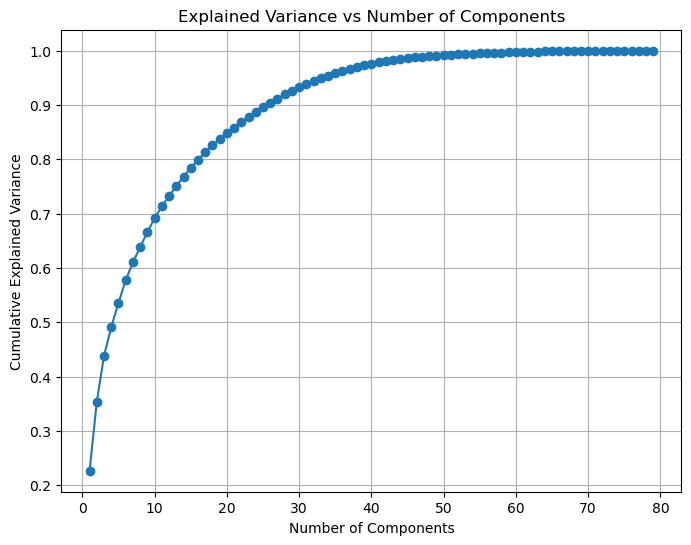

In [23]:
# Calculate explained variance ratio and cumulative variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid()
plt.show()


In [24]:
# Set the number of principal components to keep
optimal_components = 20 
pca = PCA(n_components=optimal_components)

# Apply PCA transformation to the dataset X
pca_result = pca.fit_transform(X)

# Create a new DataFrame with the reduced dimensions (principal components)
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(optimal_components)])
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.208614  0.571191  0.268132  1.265736 -0.152033 -0.087036  0.244928   
1  2.064419  0.095764 -0.721037  1.079836  0.511818  0.358172  0.565674   
2  2.092336  0.366945 -0.385762  0.928412  0.267522  1.049264  0.833201   
3  1.071778  0.734872 -0.152518  1.252559  0.264455  0.358849 -0.842582   
4  3.948852 -1.014989 -0.263097 -0.544397  0.186101 -1.156001 -0.123447   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.960145 -0.324972  0.975343 -0.029631 -0.085810  0.697973  0.001634   
1  0.315513 -0.721145 -0.593982 -0.080719 -0.065054 -0.388599  0.066021   
2  0.218397 -0.773513 -0.620884 -0.079098 -0.500319 -0.115868 -0.097287   
3  0.271380 -0.481571  0.694428 -0.060030 -0.697042  0.683961 -0.068088   
4 -0.043274 -0.497213 -0.730742 -0.054414 -0.072637  0.517641 -0.361768   

       PC15      PC16      PC17      PC18      PC19      PC20  
0 -0.090724 -0.299645 -0.497557 -0

## Random Forest Classifier


### Before PCA

In [25]:
# Split the dataset into training and testing sets (70% train, 30% test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Train a Random Forest classifier using the training data.
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
# Make predictions on the training data and calculate training accuracy.
train_predictions = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Train accuracy = ", train_accuracy)

# Make predictions on the test data and calculate test accuracy.
y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred)
print("Test accuracy = ", test_accuracy)

# Display a detailed classification report for the test predictions.
print(classification_report(y_test, y_pred))

Train accuracy =  1.0
Test accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



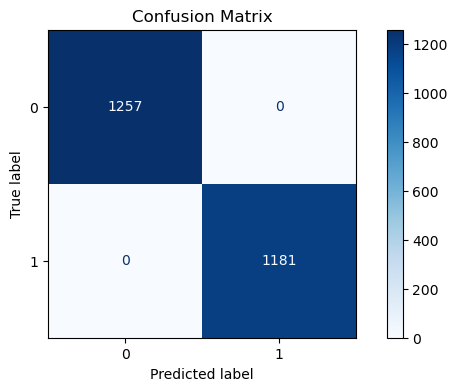

In [28]:
# Compute and display the confusion matrix for the test predictions.
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix with a blue color map.
plt.figure(figsize=(8, 4))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())  
plt.title("Confusion Matrix")
plt.show()

### After PCA

In [29]:
# Split the PCA-transformed data into training and testing sets (70% train, 30% test).
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.3, random_state=42)

In [ ]:
# Train a Random Forest classifier on the PCA-transformed training data.
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the training data and calculate training accuracy.
train_predictions = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Train accuracy = ", train_accuracy)

# Make predictions on the test data and calculate test accuracy.
y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy = ", test_accuracy)

# Display a detailed classification report for the test predictions.
print(classification_report(y_test, y_pred))

Train accuracy =  1.0
Test accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



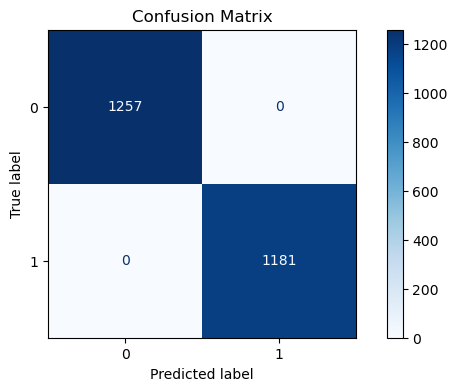

In [30]:
# Compute and display the confusion matrix for the test predictions.
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix with a blue color map.
plt.figure(figsize=(8, 4))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())  # Use plt.gca() to plot on the current axis
plt.title("Confusion Matrix")
plt.show()


In [30]:
# Perform 5-fold cross-validation with a Random Forest classifier.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
for train_index, test_index in kf.split(pca_df):
    # Split the data into training and test sets for each fold.
    X_train, X_test = pca_df.iloc[train_index], pca_df.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Random Forest classifier on the training data.
    rf.fit(X_train, y_train)
    
    # Make predictions on the test data and calculate accuracy.
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    # Print the accuracy for each fold.
    print(f"Fold {fold}: Accuracy = {acc:.2f}")
    fold += 1

Fold 1: Accuracy = 1.00
Fold 2: Accuracy = 1.00
Fold 3: Accuracy = 1.00
Fold 4: Accuracy = 1.00
Fold 5: Accuracy = 1.00


## Logisic Regression


### Before Hyperparameter Tuning

In [31]:
# Split the PCA-transformed data into training and testing sets (70% train, 30% test).
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.3, random_state=42)

In [32]:
# Train a Logistic Regression model on the training data.
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Make predictions on the training data and calculate training accuracy.
train_predictions = lr.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Train accuracy = ", train_accuracy)

# Make predictions on the test data and calculate test accuracy.
y_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy = ", test_accuracy)

# Display a detailed classification report for the test predictions.
print(classification_report(y_test, y_pred))


Train accuracy =  0.9757298628209637
Test accuracy =  0.9766201804757998
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1257
           1       0.99      0.97      0.98      1181

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



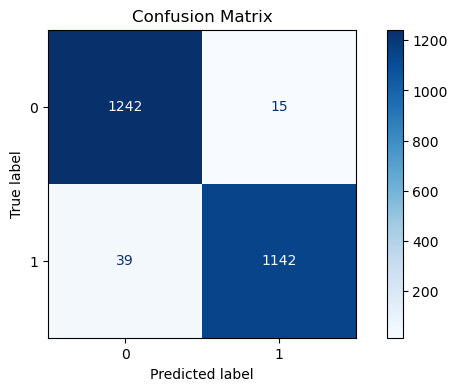

In [189]:
# Compute and display the confusion matrix for the test predictions.
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix with a blue color map.
plt.figure(figsize=(8, 4))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()


### After Hyperparameter Tuning

In [34]:
# Define parameter space for Bayesian optimization in Logistic Regression.
param_space_lr = {
    'C': (0.01, 100.0, 'log-uniform'),  # Regularization strength, log-uniform distribution.
    'solver': ['liblinear', 'saga'],     # Solvers to use.
    'max_iter': (100, 500)               # Max iterations for convergence.
}

# Initialize Logistic Regression model.
lr = LogisticRegression(random_state=42)

# Initialize BayesSearchCV with the specified parameter space.
bayes_search_lr = BayesSearchCV(
    estimator=lr,
    search_spaces=param_space_lr,
    n_iter=50,         # Number of iterations.
    cv=3,              # Cross-validation folds.
    scoring='accuracy',
    n_jobs=-1,         # Use all available CPUs.
    random_state=42
)

# Fit the model using the training data.
bayes_search_lr.fit(X_train, y_train)

# Output the best parameters and performance based on cross-validation.
print("Best Parameters for Logistic Regression:", bayes_search_lr.best_params_)
print("Best Cross-Validation Accuracy:", bayes_search_lr.best_score_)

# Make predictions on the test set.
y_pred_lr = bayes_search_lr.predict(X_test)

# Print accuracy and classification report on the test set.
print("Test Set Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Best Parameters for Logistic Regression: OrderedDict({'C': 0.1380125748724322, 'max_iter': 100, 'solver': 'saga'})
Best Cross-Validation Accuracy: 0.9767848991906304
Test Set Accuracy: 0.9782608695652174
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1257
           1       0.99      0.97      0.98      1181

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



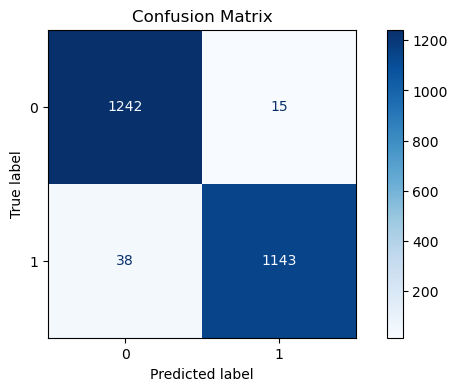

In [37]:
# Compute and display the confusion matrix for the test predictions from the tuned Logistic Regression model.
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix with a blue color map.
plt.figure(figsize=(8, 4))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()


## Gradient Boosting Classifier

### Before Hyperparameter Tuning

In [38]:
# Split the PCA-transformed data into training and testing sets (70% train, 30% test).
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.3, random_state=42)


In [39]:
# Train a Gradient Boosting classifier on the training data.
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [40]:
# Make predictions on the training data and calculate training accuracy.
train_predictions = gb_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Train accuracy = ", train_accuracy)

# Make predictions on the test data and calculate test accuracy.
y_pred = gb_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy = ", test_accuracy)

# Display a detailed classification report for the test predictions.
print("Classification Report:\n", classification_report(y_test, y_pred))


Train accuracy =  1.0
Test accuracy =  0.9967186218211649
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1257
           1       1.00      0.99      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



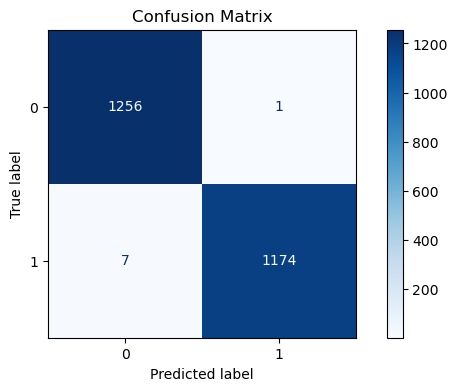

In [41]:
# Compute and display the confusion matrix for the test predictions from the Gradient Boosting model.
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix with a blue color map.
plt.figure(figsize=(8, 4))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()


### After Hyperparameter Tuning

In [ ]:
# Define the hyperparameter search space for Gradient Boosting Classifier.
param_space_gb = {
    'n_estimators': (50, 500),        # Number of trees to use.
    'learning_rate': (0.01, 1.0, 'log-uniform'),  # Learning rate for boosting.
    'max_depth': (3, 10),              # Maximum depth of the trees.
    'min_samples_split': (2, 20),      # Minimum samples required to split an internal node.
    'min_samples_leaf': (1, 20),       # Minimum samples required to be at a leaf node.
    'subsample': (0.5, 1.0),           # Fraction of samples used for fitting trees.
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider at each split.
}

# Initialize Bayesian Search for hyperparameter optimization.
bayes_search_gb = BayesSearchCV(
    estimator=gb_clf,           # Model to tune.
    search_spaces=param_space_gb,  # Hyperparameter search space.
    n_iter=50,                  # Number of iterations for the search.
    cv=3,                       # Cross-validation splits.
    scoring='accuracy',         # Metric to optimize.
    n_jobs=-1,                  # Use all available CPU cores.
    random_state=42
)

# Fit the model with the best hyperparameters.
bayes_search_gb.fit(X_train, y_train)

# Output the best parameters and cross-validation accuracy.
print("Best Parameters for Gradient Boosting Classifier:", bayes_search_gb.best_params_)
print("Best Cross-Validation Accuracy:", bayes_search_gb.best_score_)

# Evaluate the optimized model on the test set.
y_pred_gb = bayes_search_gb.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


Best Parameters for Gradient Boosting Classifier: OrderedDict({'learning_rate': 0.4729080547055919, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 19, 'min_samples_split': 18, 'n_estimators': 78, 'subsample': 0.5691542691392876})
Best Cross-Validation Accuracy: 1.0
Test Set Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



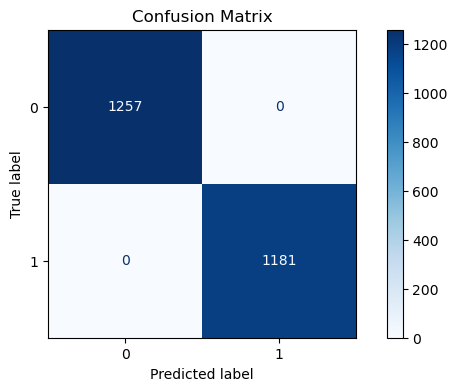

In [92]:
# Compute and display the confusion matrix for the Gradient Boosting predictions on the test set.
cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix with a blue color map.
plt.figure(figsize=(8, 4))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())  # Use plt.gca() to plot on the current axis
plt.title("Confusion Matrix")
plt.show()

In [42]:
# Define KFold cross-validation with 5 splits and shuffling.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize fold number for iteration.
fold = 1

# Iterate over the splits generated by KFold.
for train_index, test_index in kf.split(pca_df):
    # Split the data into training and testing sets.
    X_train, X_test = pca_df.iloc[train_index], pca_df.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Random Forest model.
    rf.fit(X_train, y_train)
    
    # Predict on the test set and calculate accuracy.
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    # Print accuracy for the current fold.
    print(f"Fold {fold}: Accuracy = {acc:.2f}")
    fold += 1


Fold 1: Accuracy = 1.00
Fold 2: Accuracy = 1.00
Fold 3: Accuracy = 1.00
Fold 4: Accuracy = 1.00
Fold 5: Accuracy = 1.00


## Extra Trees Classifier

In [177]:
# Split the dataset into training and testing sets with 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.2, random_state=42)


In [179]:
# Initialize and train an Extra Trees Classifier with specified hyperparameters.
et_clf = ExtraTreesClassifier(
    n_estimators=100,      # Number of trees in the forest.
    max_depth=None,        # No limit on the depth of the trees.
    min_samples_split=2,   # The minimum number of samples required to split an internal node.
    random_state=42        # For reproducibility of results.
)

# Fit the classifier to the training data.
et_clf.fit(X_train, y_train)


ExtraTreesClassifier(random_state=42)

In [180]:
# Predict using the trained Extra Trees Classifier on the test set.
y_pred_et = et_clf.predict(X_test)

# Calculate the accuracy of the model on the test set.
accuracy = accuracy_score(y_test, y_pred_et)
print("Extra Trees Classifier Test Set Accuracy:", accuracy)

# Print the classification report for detailed performance metrics.
print("\nClassification Report:\n", classification_report(y_test, y_pred_et))


Extra Trees Classifier Test Set Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

